In [ ]:
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!gdown --id 12TX8OKrwwXpo3SDDd6rllwNAF45GP-J-

Downloading...
From: https://drive.google.com/uc?id=12TX8OKrwwXpo3SDDd6rllwNAF45GP-J-
To: /content/Data Set 1.csv
100% 1.15k/1.15k [00:00<00:00, 3.91MB/s]


In [ ]:
!gdown --id 1XOQEnnC1Z2sZa-IofkpV6vUPpnV4VFfZ

Downloading...
From: https://drive.google.com/uc?id=1XOQEnnC1Z2sZa-IofkpV6vUPpnV4VFfZ
To: /content/Data Set 2.csv
100% 2.82k/2.82k [00:00<00:00, 7.71MB/s]


# DATA SET 1

In [ ]:
df_covid19 = pd.read_csv("Data Set 1.csv")

**SOAL 1**

Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel,
terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.

In [ ]:
df_covid19.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4


In [ ]:
df_covid19 = df_covid19.set_index('date')

In [ ]:
df_line = df_covid19[["acc_tested","acc_negative","acc_confirmed"]]

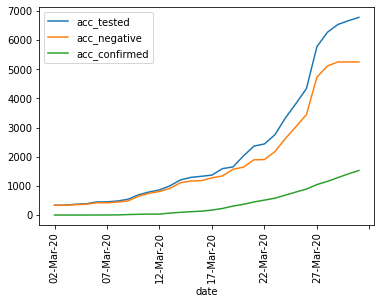

In [ ]:
df_line.plot(kind="line")
plt.xticks(rotation=90)
plt.show()

**SOAL 2**

•Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu.
Positive rate = Jumlah terkonfirmasi positif /
Jumlah tes sampel
× 100%

Negative rate = Jumlah terkonfirmasi negatif /
Jumlah tes sampel × 100%

• Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan
negativity rate untuk periode waktu yang tersedia.

• Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?

• Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

In [ ]:
df_covid19["positive_rate"] = (df_covid19["acc_confirmed"]/df_covid19["acc_tested"])*100
df_covid19["negative_rate"] = (df_covid19["acc_negative"]/df_covid19["acc_tested"])*100

In [ ]:
df_covid19.head()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,positive_rate,negative_rate
date,,,,,,,,,
02-Mar-20,339,339,2,2,335,2,2,0.589971,98.820059
03-Mar-20,2,341,0,2,337,2,2,0.586510,98.826979
04-Mar-20,31,372,0,2,356,14,2,0.537634,95.698925
05-Mar-20,16,388,0,2,371,15,2,0.515464,95.618557
06-Mar-20,62,450,2,4,422,24,4,0.888889,93.777778


In [ ]:
df_grafik = df_covid19[["positive_rate","negative_rate"]]

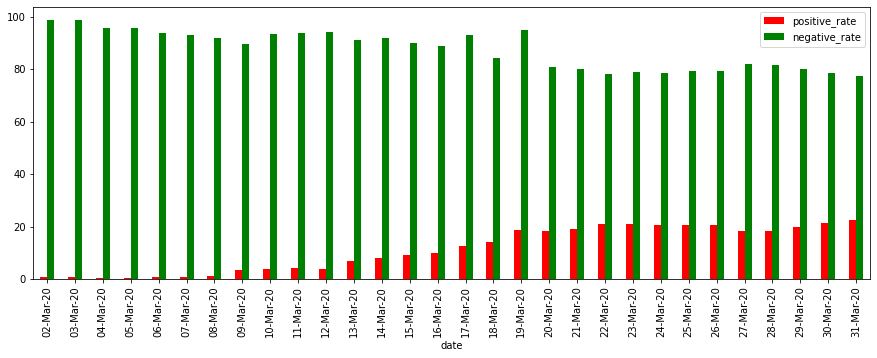

In [ ]:
df_grafik.plot(kind="bar", figsize= (15,5), color = ['r','g'])
plt.xticks(rotation=90)
plt.show()

Nilai positive rate yang menunjukkan nilai tertinggi pada tanggal 31 Maret 2020

In [ ]:
df_covid19[['positive_rate']].idxmax()

positive_rate    31-Mar-20
dtype: object

Nilai negative rate yang menunjukkan nilai tertinggi pada tanggal 03 Maret 2020

In [ ]:
df_covid19[['negative_rate']].idxmax()

negative_rate    03-Mar-20
dtype: object

**SOAL 3**

•Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada
dataset.

•Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan
penjelasan terkait nilai korelasi tersebut.

•Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan
penjelasan terkait nilai korelasi tersebut.

Text(0.5, 1.0, 'KORELASI ANTAR VARIABLE')

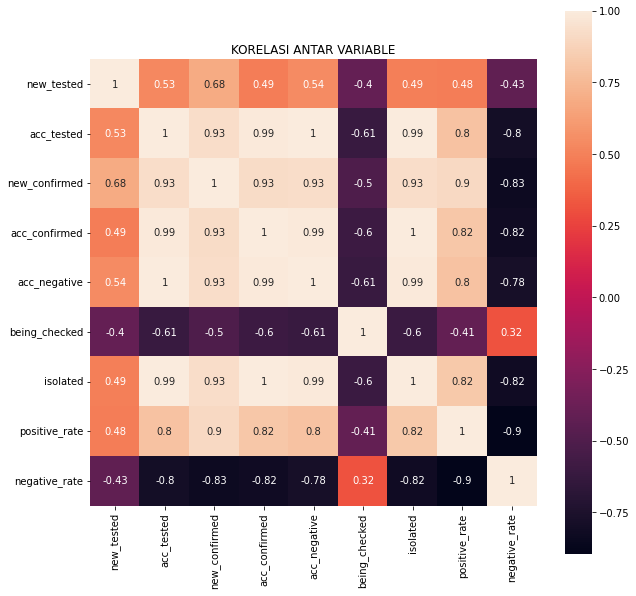

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_covid19.corr(), square=True, annot=True)
plt.title("KORELASI ANTAR VARIABLE")



# DATA SET 2

**SOAL 4**

• Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap
populasi per km2 untuk masing-masing provinsi.

• Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut
untuk masing-masing provinsi.

• Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya

In [ ]:
df2_covid192 = pd.read_csv("Data Set 2.csv")

In [ ]:
df2_covid192 = df2_covid192.set_index("province_name")

In [ ]:
df2_covid192.head()

,province_id,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
province_name,,,,,,,,,,,
Aceh,1,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
Bali,2,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
Banten,3,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
Bengkulu,4,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
DI Yogyakarta,5,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [ ]:
df2_covid192["percent_positive"] = df2_covid192["confirmed"]/df2_covid192["population_kmsquare"]*100

In [ ]:
df2_covid192.head()


,province_id,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,percent_positive
province_name,,,,,,,,,,,,
Aceh,1,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994,4.651163
Bali,2,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731,1.219512
Banten,3,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299,6.471495
Bengkulu,4,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725,0.000000
DI Yogyakarta,5,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382,1.940035


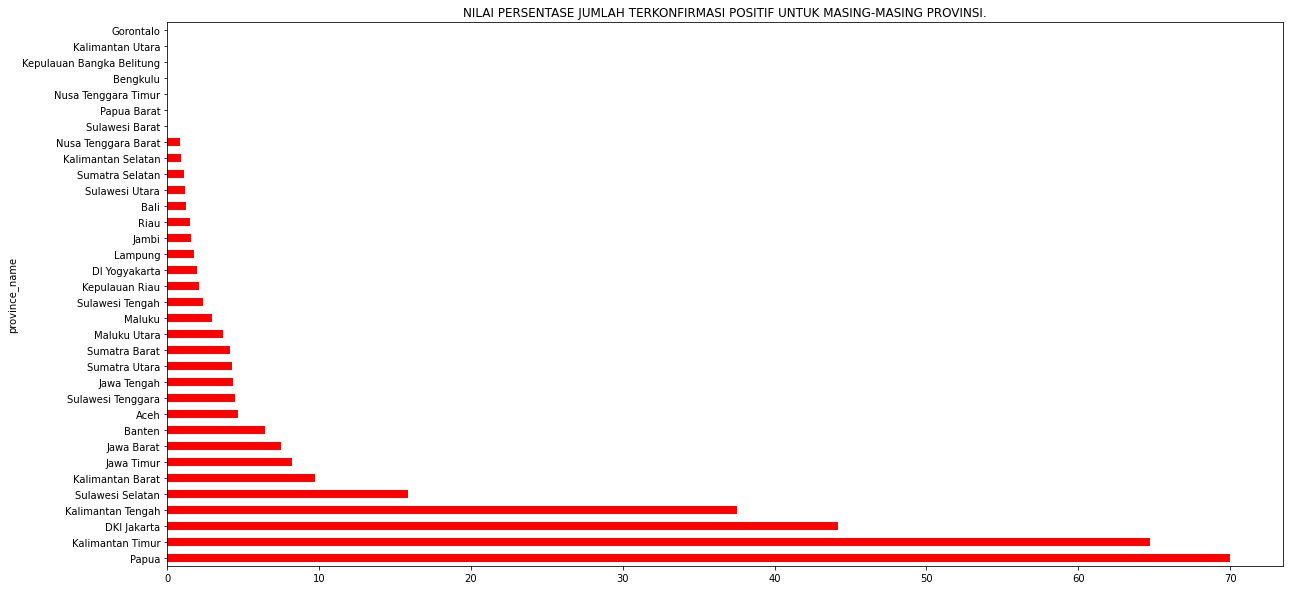

In [ ]:
df2_covid192.sort_values(["percent_positive"], ascending=False, axis=0, inplace=True)
df2_grafik = df2_covid192["percent_positive"]
df2_grafik.plot(kind="barh", figsize=(20,10), color = ["r"])
plt.title("NILAI PERSENTASE JUMLAH TERKONFIRMASI POSITIF UNTUK MASING-MASING PROVINSI.")
plt.show()

3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya

In [ ]:
df2_covid192.head(3)

,province_id,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,percent_positive
province_name,,,,,,,,,,,,
Papua,24,Papua,PA,Jayapura,3091047,10,7,0,0,138.570.557,-3.579.213,70.000000
Kalimantan Timur,15,Kalimantan,KI,Samarinda,3351432,17,11,0,0,116.806.641,0.307616,64.705882
DKI Jakarta,6,Jawa,JK,Jakarta,10012271,1353,598,51,31,106.853.027,-6.162.401,44.198078


**SOAL 5**

Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk
masing-masing pulau.

In [ ]:
df_island = df2_covid192.groupby('island', axis=0).sum()
df_island.sort_values(["confirmed"], ascending=False, axis=0, inplace=True)
df_island.head()

,province_id,population,population_kmsquare,confirmed,deceased,released,percent_positive
island,,,,,,,
Jawa,44,143432781,6883,911,81,46,72.663077
Sulawesi,152,18471854,631,35,1,0,23.875150
Sumatra,192,54412234,1257,29,2,0,21.065740
Kalimantan,70,15048557,190,22,0,0,112.896559
Kepulauan Nusa Tenggara,47,13915592,1083,11,2,0,2.056332


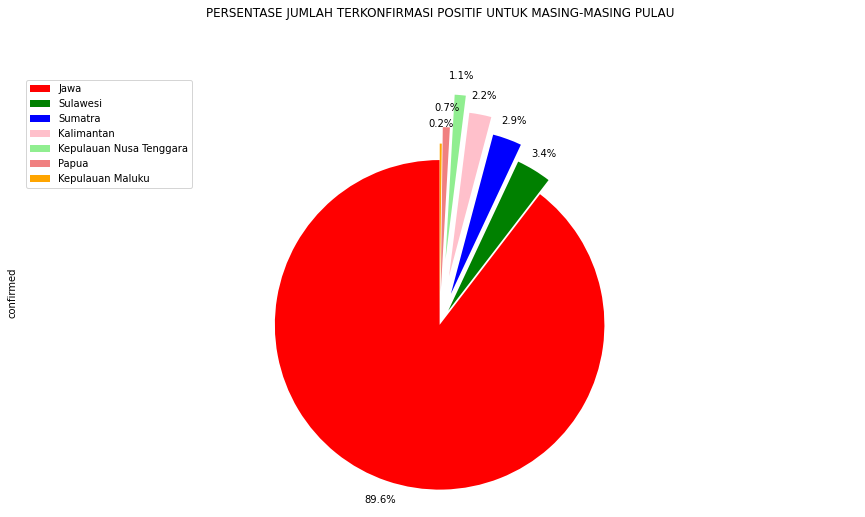

In [ ]:
colors_list = ['red', 'green', 'blue', 'pink', 'lightgreen', 'lightcoral', 'orange']
explode_list = [0, 0.1, 0.2, 0.3, 0.4,0.2,0.1]
df_island['confirmed'].plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%',
                            startangle=90,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                            )


plt.title('PERSENTASE JUMLAH TERKONFIRMASI POSITIF UNTUK MASING-MASING PULAU', y=1.12)

plt.axis('equal')

plt.legend(labels=df_island.index, loc='upper left')

plt.show()